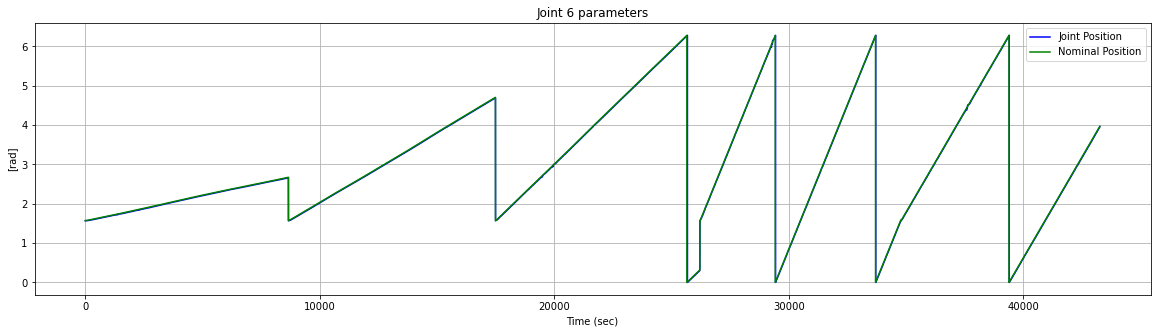

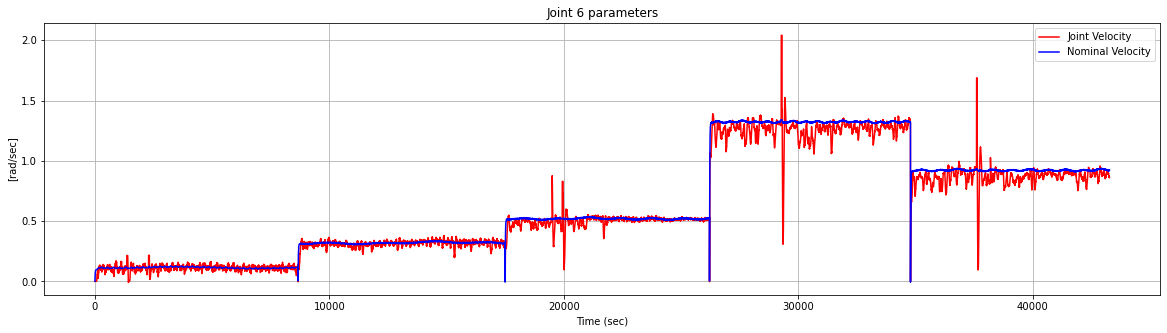

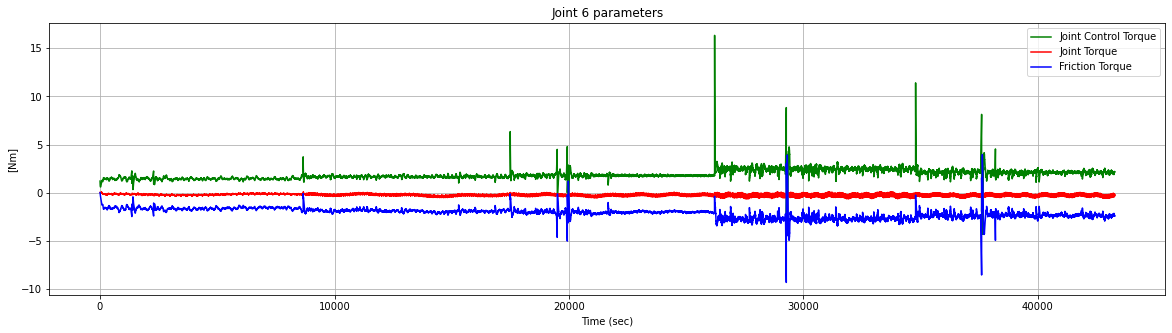

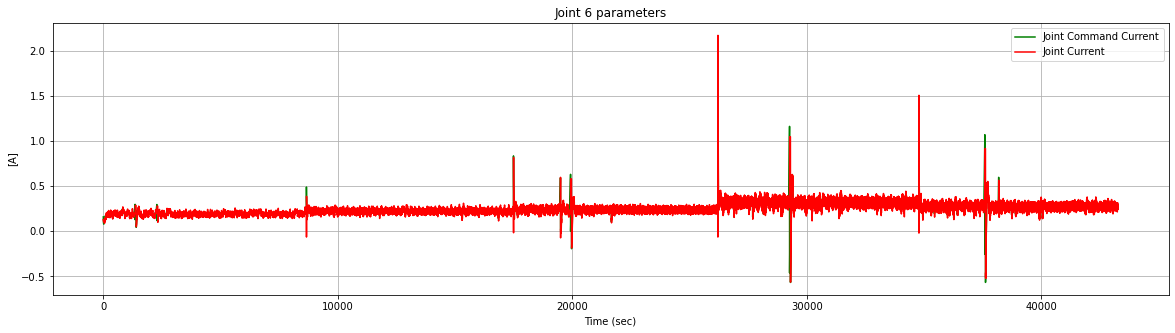

In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import csv
import glob
path = 'data' # use your folder name
file_name = glob.glob(path + "/*.csv")
jnt_ctrl_torque=[]
jnt_position=[]
jnt_velocity=[]
jnt_torque=[]
jnt_command_current=[]
jnt_current=[]
friction_torque=[]
nominal_pos=[]
nominal_vel=[]
initial_position=[]
initial_velocity=[]
t=[]
c=0
for j in file_name:
    content = genfromtxt(j, delimiter=' ')
    for i in content[:,0]:
        jnt_ctrl_torque.append(i)
        c=c+1
        t.append(c)
    for i in content[:,1]:
        jnt_position.append(i)
    for i in content[:,2]:
        jnt_velocity.append(i)
    for i in content[:,3]:
        jnt_torque.append(i)
    for i in content[:,4]:
        jnt_command_current.append(i)
    for i in content[:,5]:
        jnt_current.append(i)
    for i in content[:,6]:
        friction_torque.append(i)
    for i in content[:,7]:
        nominal_pos.append(i)
    for i in content[:,8]:
        nominal_vel.append(i)
    for i in content[:,9]:
        initial_position.append(i)
    for i in content[:,10]:
        initial_velocity.append(i)


fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(t, jnt_position, color='b', label='Joint Position')
plt.plot(t, nominal_pos, color='g', label='Nominal Position')
plt.legend()
plt.grid()
plt.title("Joint 6 parameters")
plt.xlabel("Time (sec)")
plt.ylabel("[rad]")
plt.savefig('plots/Position.png')
plt.show()


fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(t, jnt_velocity, color='r', label='Joint Velocity')
plt.plot(t, nominal_vel, color='b', label='Nominal Velocity')
plt.legend()
plt.grid()
plt.title("Joint 6 parameters")
plt.xlabel("Time (sec)")
plt.ylabel("[rad/sec]")
plt.savefig('plots/Velocity.png')
plt.show()

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(t, jnt_ctrl_torque, color='g', label='Joint Control Torque')
plt.plot(t, jnt_torque, color='r', label='Joint Torque')
plt.plot(t, friction_torque, color='b', label='Friction Torque')
plt.legend()
plt.grid()
plt.title("Joint 6 parameters")
plt.xlabel("Time (sec)")
plt.ylabel("[Nm]")
plt.savefig('plots/Torque.png')
plt.show()

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(t, jnt_command_current, color='g', label='Joint Command Current')
plt.plot(t, jnt_current, color='r', label='Joint Current')
plt.legend()
plt.grid()
plt.title("Joint 6 parameters")
plt.xlabel("Time (sec)")
plt.ylabel("[A]")
plt.savefig('plots/Current.png')
plt.show()